# TODO
- image processing (divide into text type): detect title text (large, green) and recipe text (bold) [able to isolate title (green) but probably not possible to isolate bold text]
- image processing 2 (divide into groups): detect each grouping of text and use position on page to determine which are important
- figure out how to read fractions

In [4]:
def plotimage(img, cmap=None):
    plt.imshow(img, cmap)
    plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
    plt.show()

In [2]:
# convert image to grayscale
# apply binary threshold
# apply dilation to thicken lines
# identify contours (findContours)
# draw bounding box
# algorithm

In [25]:
import cv2
import matplotlib.pyplot as plt

2008 225
565 580
1012 505
319 177
284 120
524 251
2256 556
1740 403
240 164


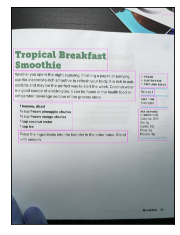

In [72]:
img = cv2.imread('pics/tropical_breakfast_smoothie.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_,thresh = cv2.threshold(gray,150,255,cv2.THRESH_BINARY_INV) # threshold
kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(3,3))
dilated = cv2.dilate(thresh,kernel,iterations = 35) # dilate
#plotimage(dilated, 'gray')
contours,hierarchy = cv2.findContours(dilated,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
for contour in contours:
    # get rectangle bounding contour
    [x,y,w,h] = cv2.boundingRect(contour)

    # discard areas that are too large
    if w>3000:
        continue

    # discard areas that are too small
    if h<100 or w<100:
        continue
        
    print(w,h)

    # draw rectangle around contour on original image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,255),2)
plotimage(img)

In [47]:
#import pytesseract
#img = cv2.imread('pics/tropical_breakfast_smoothie.jpg')
#text = pytesseract.image_to_string(img)
#print(text)